In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [6]:
test_df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/car_price_prediction_data/test.csv')
train_df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/car_price_prediction_data/train.csv')
train_df.shape, test_df.shape

((188533, 13), (125690, 12))

In [7]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [9]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


## Handeling missing values

In [10]:
train_df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15


In [11]:
train_df['fuel_type'].isnull()

,fuel_type
0,False
1,False
2,False
3,False
4,False
...,...
188528,False
188529,False
188530,False
188531,False


In [12]:
# Gasoline is the most common feul_type, so I will fill the missing values in this column with Gasoline
train_df['fuel_type']=train_df['fuel_type'].fillna('Gasoline')
train_df['fuel_type'].isnull().sum()


0

In [13]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [14]:
train_df.accident.value_counts()

,count
accident,
None reported,144514
At least 1 accident or damage reported,41567


In [15]:
train_df.clean_title.value_counts()

,count
clean_title,
Yes,167114


In [16]:
train_df.head(20)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [17]:
train_df[train_df.accident.isnull() & train_df.clean_title.notnull()]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2060,2060,Lexus,GX 460 Base,2020,48210,Gasoline,4.6 Liter,Automatic,Nebula Gray Pearl,–,NaN,Yes,28825
15226,15226,Audi,A-Class A 220 4MATIC,2019,74725,Gasoline,2.0L I4 16V GDI DOHC,7-Speed Automatic with Auto-Shift,Black,Black,NaN,Yes,36995
68518,68518,Mazda,CX-9 Grand Touring,2021,49528,Gasoline,2.5L I4 16V GDI DOHC Turbo,6-Speed Automatic,Sonic Silver Metallic,Black,NaN,Yes,68495
73560,73560,Tesla,Model Y Long Range,2020,29850,Gasoline,425.0HP Electric Motor Electric Fuel System,A/T,Red,White,NaN,Yes,24980
79294,79294,Ford,Expedition Limited,2021,23842,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Gray,Medium Stone,NaN,Yes,35113
86370,86370,Mercedes-Benz,E-Class E 350 4MATIC,2019,46150,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Black,Black,NaN,Yes,32324
97855,97855,INFINITI,QX80 Base,2014,99700,Gasoline,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,NaN,Yes,14500
118394,118394,Jeep,Grand Cherokee WK Laredo X,2021,16554,Gasoline,3.6L V6 24V MPFI DOHC,9-Speed Automatic,Velvet Red Pearlcoat,Global Black,NaN,Yes,53900
127862,127862,Chevrolet,Equinox Premier w/2LZ,2020,84224,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Sting Gray Clearcoat,Jet Black,NaN,Yes,33687
130831,130831,Chevrolet,Tahoe RST,2022,56247,Gasoline,5.3L V8 16V GDI OHV,10-Speed Automatic,Black,Jet Black,NaN,Yes,75499


In [18]:
train_df[(train_df.accident=='At least 1 accident or damage reported') & (train_df.clean_title.isnull())]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
122,122,Acura,TLX,2020,60854,Gasoline,2.0 Liter DOHC Turbo,Automatic,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,19425
256,256,BMW,840 Gran Coupe i xDrive,2020,29336,Gasoline,3.0 Liter Turbo,Automatic,Black Sapphire Metallic,Black,At least 1 accident or damage reported,NaN,50658
284,284,Subaru,Outback Limited XT,2020,39948,Gasoline,2.5L H4 16V MPFI DOHC,Automatic CVT,Magnetite Gray Metallic,Black,At least 1 accident or damage reported,NaN,24590
643,643,Toyota,Tundra Limited,2020,61494,Hybrid,3.4L V6 24V PDI DOHC Twin Turbo Hybrid,Automatic,Midnight Black Metallic,Black,At least 1 accident or damage reported,NaN,34084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187370,187370,Porsche,911 Turbo,2016,5409,Gasoline,3.8L H6 24V GDI DOHC Twin Turbo,6-Speed Manual,Gray,–,At least 1 accident or damage reported,NaN,82499
187396,187396,BMW,M5 Base,2018,47850,Gasoline,4.4L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Black,Black,At least 1 accident or damage reported,NaN,26999
187812,187812,RAM,1500 Classic Warlock,2019,20296,E85 Flex Fuel,3.6L V6 24V MPFI DOHC Flexible Fuel,8-Speed Automatic,Diamond Black,Diesel Gray / Black,At least 1 accident or damage reported,NaN,32541
187851,187851,Toyota,4Runner Limited,2018,82260,Gasoline,4.0L V6 24V MPFI DOHC,5-Speed Automatic,Midnight Black Metallic,Sand Beige,At least 1 accident or damage reported,NaN,35998


In [19]:
train_df['accident']=train_df['accident'].fillna('None reported')

In [20]:
train_df['clean_title']=train_df.clean_title.fillna('No')

In [21]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


## Exploratory Data Analysis (EDA)

<Axes: xlabel='model_year', ylabel='price'>

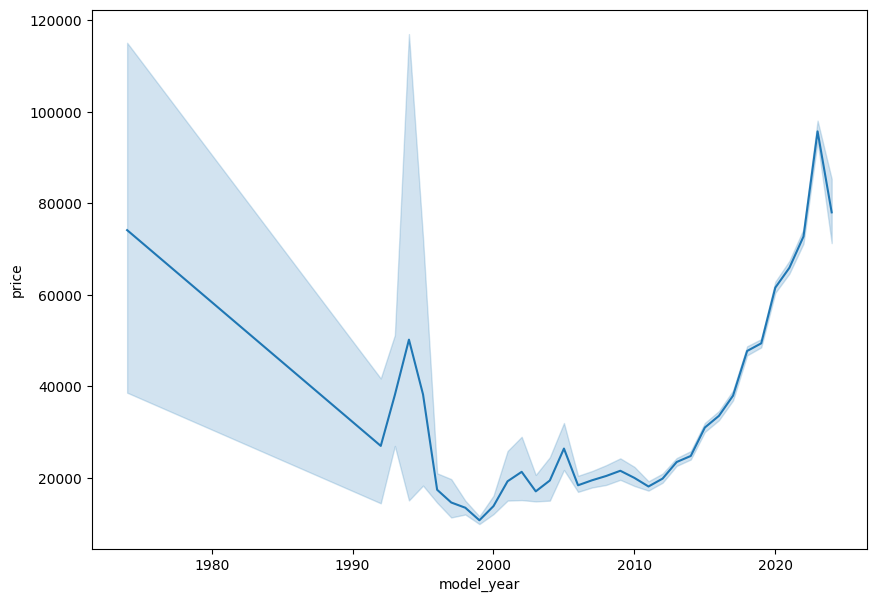

In [22]:
plt.figure(figsize=(10,7))

sns.lineplot(x='model_year',
             y='price',
             data=train_df)


<Axes: xlabel='model_year', ylabel='count'>

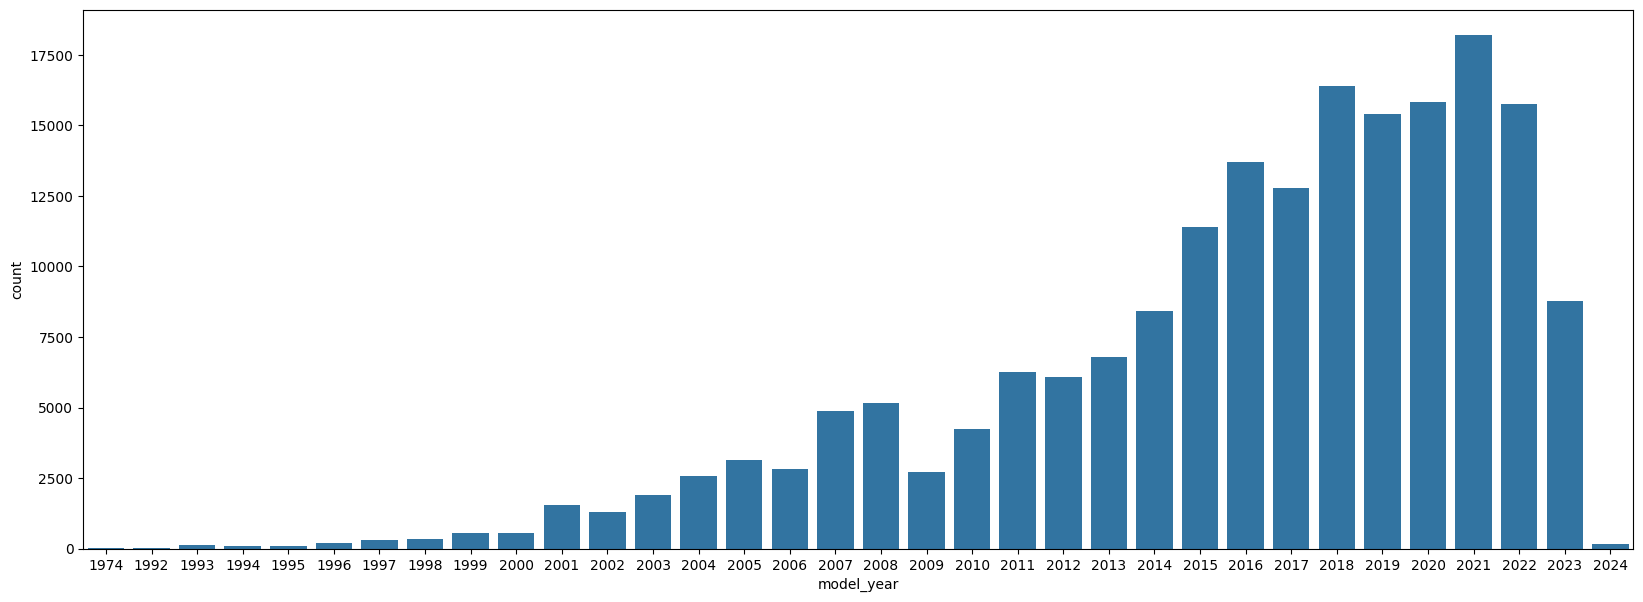

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(data=train_df,
             x='model_year',
            )

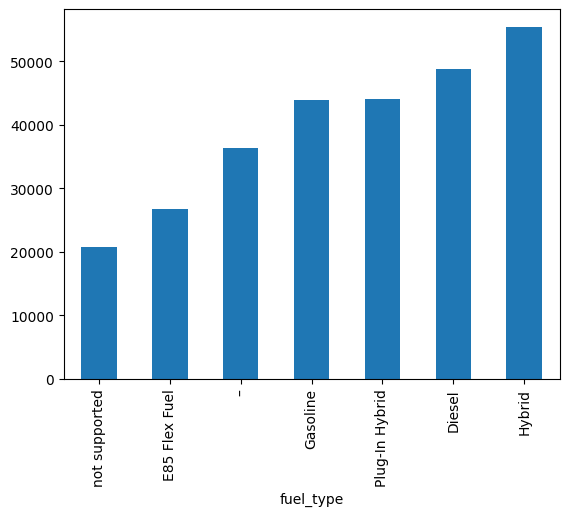

In [24]:
# Mean Price for Each Fuel Type
train_df.groupby(['fuel_type'])['price'].mean().sort_values().plot(kind='bar')
plt.show()

In [25]:
train_df.brand.value_counts().sort_values(ascending=False)

,count
brand,
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850
Lexus,8643


<Axes: xlabel='brand'>

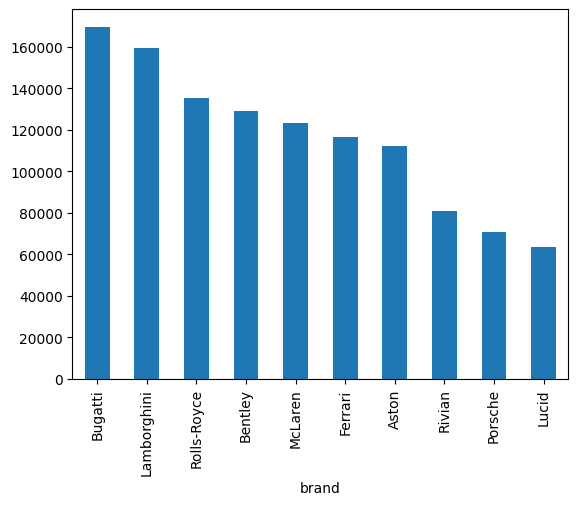

In [26]:
# Top 10 car brand based on their prices
train_df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [27]:
luxurious_brands = [
    'Bentley', 'Porsche', 'Rolls-Royce', 'Jaguar', 'Ferrari',
    'Lamborghini', 'Maserati', 'Bugatti', 'Aston', 'Maybach'
]

train_df['brand_type']=train_df.brand.apply(lambda x: 'luxury' if x in luxurious_brands else 'normal' )
train_df['brand_type'][:10]

,brand_type
0,normal
1,normal
2,normal
3,normal
4,normal
5,normal
6,normal
7,normal
8,normal
9,normal


Text(0.5, 1.0, 'Mean price of a car based on its brand type')

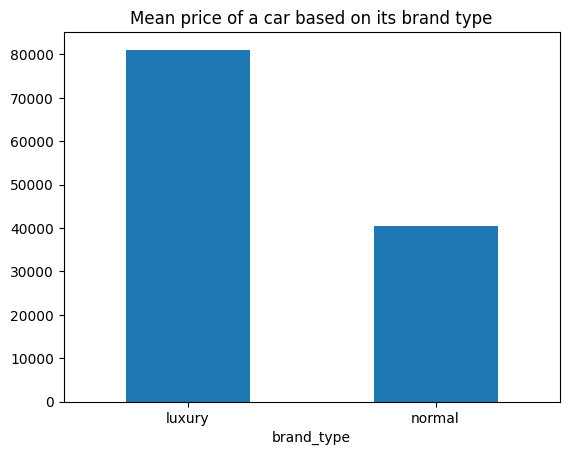

In [28]:
train_df.groupby(['brand_type'])['price'].mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Mean price of a car based on its brand type')

Text(0.5, 1.0, 'Mean price of a car based on its age group')

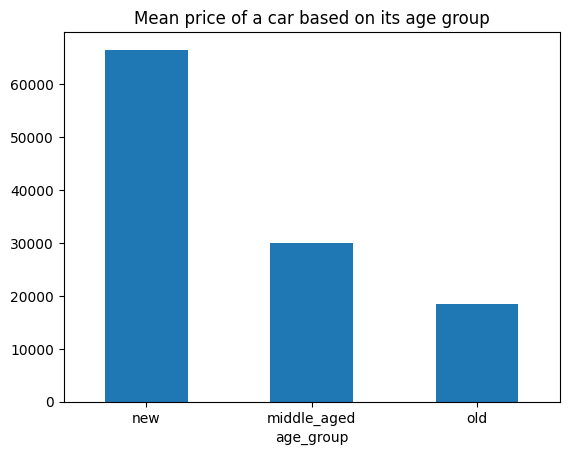

In [29]:
current_year=2024

train_df['car_age']=current_year-train_df.model_year

def categorize_car_age(car_age):
    if car_age <= 5:
        return 'new'
    elif 6 <= car_age <= 20:
        return 'middle_aged'
    else:
        return 'old'

train_df['age_group']=train_df.car_age.apply(categorize_car_age)

train_df.groupby(['age_group'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Mean price of a car based on its age group')

Text(0.5, 1.0, 'Target Price Distribution')

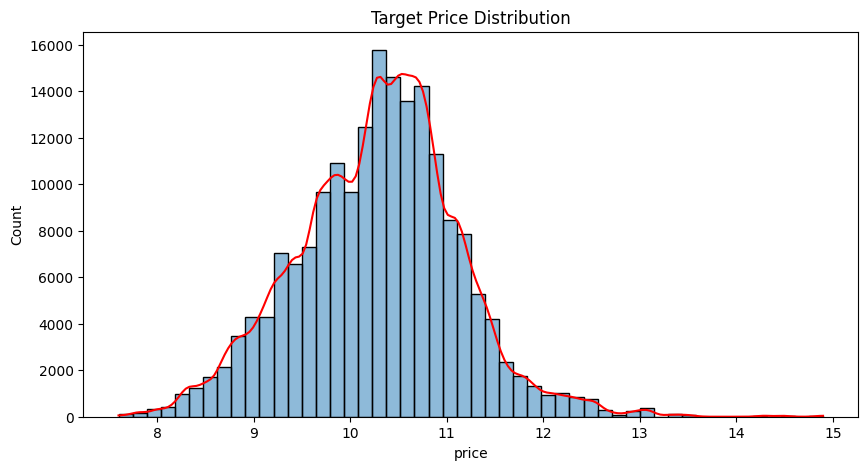

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df,
            x=np.log(train_df['price']),
            stat='count',
            bins=50,
            kde=True).lines[0].set_color('red')
plt.title('Target Price Distribution')

Text(0.5, 1.0, 'Top 10 color of cars')

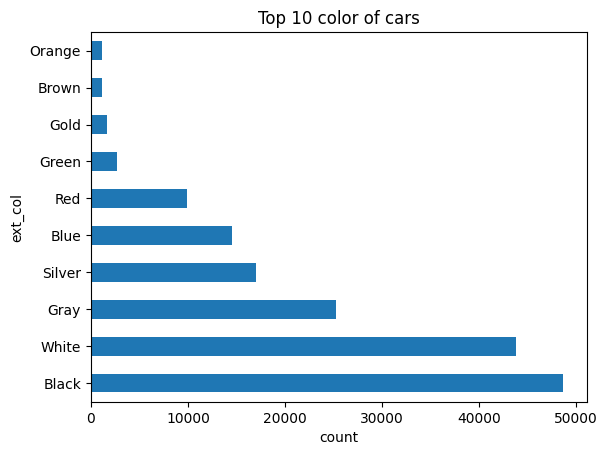

In [31]:
train_df.ext_col.value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('count')
plt.title('Top 10 color of cars')

(array([0, 1]),
 [Text(0, 0, 'At least 1 accident or damage reported'),
  Text(1, 0, 'None reported')])

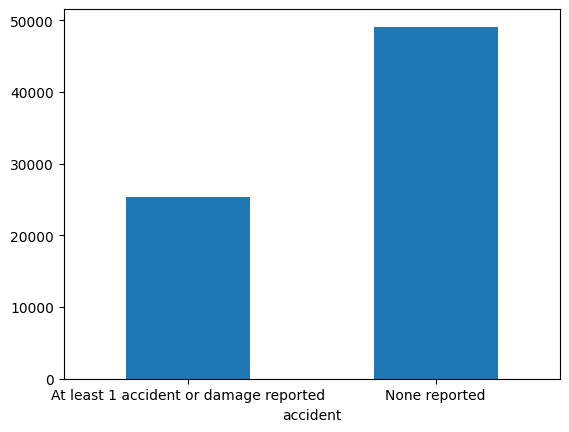

In [32]:
train_df.groupby(['accident'])['price'].mean().plot(kind='bar')
plt.xticks(rotation=360)

In [33]:
import re
def extract_engine_size(engine_str):
    match=re.search(r'(\d+\.?\d*)\s*(L|Liter)', engine_str, re.IGNORECASE)
    if match:
        return float(match.group(1))
    return None

def extract_cylinder_count(engine_str):
    match_explicit= re.search(r'(\d+)\s*Cylinder', engine_str)
    if match_explicit:
        return int(match_explicit.group(1))
    match_implicit=re.search(r'V(\d+)', engine_str)
    if match_implicit:
        return int(match_implicit.group(1))
    return None

train_df['engine_size']=train_df.engine.apply(extract_engine_size)
train_df['cylinder_count']=train_df.engine.apply(extract_cylinder_count)


In [34]:
train_df.engine_size.value_counts().sort_values(ascending=False)

,count
engine_size,
3.0,25958
2.0,23123
3.5,22148
4.0,11003
6.2,10868
...,...
1.2,26
8.0,20
8.4,18


In [35]:
train_df.engine_size.isnull().sum()

6698

In [36]:
train_df.engine_size.mode()[0]

3.0

In [37]:
# most common engine_size is 3, so, I will use 3 for NaNs
train_df['engine_size']=train_df['engine_size'].fillna(3)

In [38]:
train_df.engine_size.isnull().sum()

0

In [39]:
train_df.cylinder_count.isnull().sum()

21763

In [40]:
# I will use 0 to fill missing values in cylinder_count (which means no information)
train_df['cylinder_count']=train_df['cylinder_count'].fillna(0)

In [41]:
train_df.cylinder_count.isnull().sum()

0

In [42]:
train_df.transmission.unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [43]:
# categorize transmission into three groups (Automatic, Manual, other)
def categorize_transmission(trans_str):
    if pd.isna(trans_str):
        return 'other'
    elif 'M/T' in trans_str or 'Mt' in trans_str or 'Manual' in trans_str or 'MT' in trans_str:
        return 'manual'
    elif 'A/T' in trans_str or 'Automatic' in trans_str or 'AT' in trans_str or 'CVT' in trans_str:
        return 'automatic'
    else:
        return 'other'

train_df['transmission_type']=train_df['transmission'].apply(categorize_transmission)
train_df.transmission_type.value_counts()




,count
transmission_type,
automatic,152320
other,19798
manual,16415


<Axes: xlabel='transmission_type'>

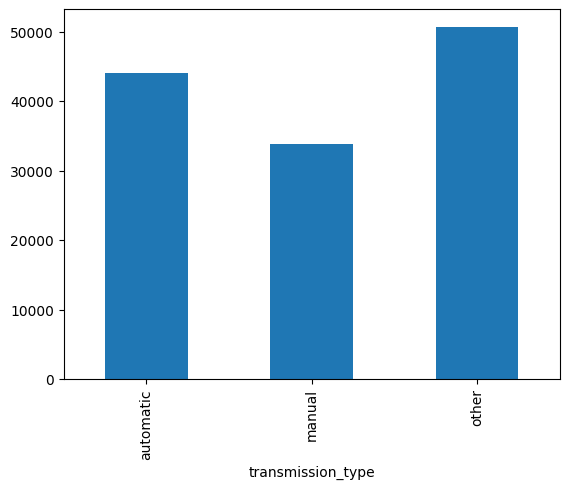

In [44]:
train_df.groupby(['transmission_type'])['price'].mean().plot(kind='bar')

In [45]:
train_df.car_age

,car_age
0,17
1,22
2,22
3,7
4,3
...,...
188528,7
188529,6
188530,3
188531,2


In [46]:
train_df['car_age']=train_df['car_age'].replace(0,1)
train_df['milage_per_year']=train_df['milage']/train_df['car_age']
train_df.milage_per_year.sort_values(ascending=False)

,milage_per_year
17645,235000.000000
158832,231500.000000
175361,227000.000000
177913,195000.000000
83862,180036.000000
...,...
45217,9.545455
119238,8.750000
24306,8.214286
141404,6.562500


In [73]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'brand_type', 'car_age', 'age_group', 'engine_size',
       'cylinder_count', 'transmission_type', 'milage_per_year'],
      dtype='object')

In [74]:
train_df_2=train_df.copy()

In [75]:
train_df_2.drop(['id', 'brand', 'model', 'model_year', 'engine',
                 'transmission','ext_col', 'int_col', 'clean_title','age_group'], axis=1, inplace=True)
train_df_2.head()

,milage,fuel_type,accident,price,brand_type,car_age,engine_size,cylinder_count,transmission_type,milage_per_year
0,213000,Gasoline,None reported,4200,normal,17,1.6,4.0,automatic,12529.411765
1,143250,Gasoline,At least 1 accident or damage reported,4999,normal,22,3.9,8.0,automatic,6511.363636
2,136731,E85 Flex Fuel,None reported,13900,normal,22,5.3,8.0,automatic,6215.045455
3,19500,Gasoline,None reported,45000,normal,7,5.0,8.0,other,2785.714286
4,7388,Gasoline,None reported,97500,normal,3,2.0,4.0,automatic,2462.666667


In [76]:
## Split data in to train and valid

from sklearn.model_selection import train_test_split

X= train_df_2.drop('price', axis=1)
y=train_df_2['price']

X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_valid.shape, y_valid.shape, y_train.shape

((150826, 9), (37707, 9), (37707,), (150826,))

In [78]:
X_train.head()

,milage,fuel_type,accident,brand_type,car_age,engine_size,cylinder_count,transmission_type,milage_per_year
184031,61675,E85 Flex Fuel,At least 1 accident or damage reported,normal,7,2.0,4.0,other,8810.714286
173831,185000,Gasoline,At least 1 accident or damage reported,normal,21,4.0,6.0,automatic,8809.523810
183819,92000,Gasoline,At least 1 accident or damage reported,normal,4,2.7,6.0,automatic,23000.000000
85525,5483,Gasoline,None reported,normal,1,2.0,4.0,manual,5483.000000
41872,5000,Gasoline,None reported,normal,1,6.2,8.0,automatic,5000.000000


In [79]:
y_train.dtype, y_valid.dtype

(dtype('int64'), dtype('int64'))

In [80]:
num_features= [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
cat_features=[label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(num_features)

print(cat_features)

['milage', 'car_age', 'engine_size', 'cylinder_count', 'milage_per_year']
['fuel_type', 'accident', 'brand_type', 'transmission_type']


In [55]:
cat_mapper = [
    ['normal', 'luxury']
]

In [81]:
onehot_encoder_features = ['fuel_type', 'transmission_type', 'accident']
ordinal_encoder_features = ['brand_type']
standard_scalar_features = ['car_age', 'milage_per_year','milage', 'cylinder_count', 'engine_size']


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Add passthrough for untransformed columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), onehot_encoder_features),
        ('ordinal', OrdinalEncoder(), ordinal_encoder_features),
        ('num', MinMaxScaler(), standard_scalar_features)
    ]
)

# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)

# Extract column names
onehot_columns = preprocessor.named_transformers_['one_hot'].get_feature_names_out(onehot_encoder_features)
ordinal_columns = ordinal_encoder_features
num_columns = standard_scalar_features


# Combine all column names
all_columns = list(onehot_columns) + ordinal_columns + num_columns

# Create DataFrames
X_train_df = pd.DataFrame(X_train_transformed, columns=all_columns, index=X_train.index)
X_valid_df = pd.DataFrame(X_valid_transformed, columns=all_columns, index=X_valid.index)



In [57]:
X_train_df.shape, X_valid_df.shape, y_train.shape, y_valid.shape

((150826, 18), (37707, 18), (150826,), (37707,))

In [82]:
X_train_df

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,transmission_type_automatic,transmission_type_manual,transmission_type_other,accident_At least 1 accident or damage reported,accident_None reported,brand_type,car_age,milage_per_year,milage,cylinder_count,engine_size
184031,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.122449,0.037471,0.152075,0.333333,0.174194
173831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.408163,0.037466,0.456656,0.500000,0.432258
183819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.061224,0.097852,0.226970,0.500000,0.264516
85525,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.023310,0.013295,0.333333,0.174194
41872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.021255,0.012102,0.666667,0.716129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.326531,0.022282,0.219822,0.666667,0.651613
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.081633,0.048745,0.141269,0.500000,0.303226
131932,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.040816,0.044659,0.077550,0.500000,0.303226
146867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.244898,0.060863,0.459126,0.500000,0.367742


In [115]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, accuracy_score

def evaluation_results(model,
                      X_train= X_train_df,
                      y_train=y_train,
                      X_valid=X_valid_df,
                      y_valid=y_valid):
    train_pred=model.predict(X_train)
    valid_pred=model.predict(X_valid)

    scores={'Training RMSE': root_mean_squared_error(y_train,
                                                   train_pred),
           'Training MAE': mean_absolute_error(y_train,
                                              train_pred),
           'Valid RMSE': root_mean_squared_error(y_valid,
                                               valid_pred),
           'Valid MAE': mean_absolute_error(y_valid,
                                           valid_pred)
            }

    return scores


In [68]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [107]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(256, activation='relu')(input)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(128, activation='relu')(x)
x=Dense(64, activation='relu')(x)
x=Dense(32, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model=Model(input, output)

# Compile the model
ANN_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history = ANN_model.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 6209101312.0000 - root_mean_squared_error: 78456.3594 - val_loss: 4783007744.0000 - val_root_mean_squared_error: 69159.2891
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 6541428736.0000 - root_mean_squared_error: 80627.0469 - val_loss: 4757730816.0000 - val_root_mean_squared_error: 68976.3047
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 6085870080.0000 - root_mean_squared_error: 77857.8047 - val_loss: 4742725120.0000 - val_root_mean_squared_error: 68867.4453
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 5095248896.0000 - root_mean_squared_error: 71206.9844 - val_loss: 4744329216.0000 - val_root_mean_squared_error: 68879.0938
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 5762284544.0000 - root_mean_squared_error: 75728.9219 - val_loss: 4723041792.0000 - val_root_mean_squared_error: 68724.3906
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 53

In [116]:
ANN_model_scores=evaluation_results(model=ANN_model)
ANN_model_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


{'Training RMSE': 74787.45256424278,
 'Training MAE': 21235.98612082142,
 'Valid RMSE': 69159.28108391287,
 'Valid MAE': 21316.59871711926}

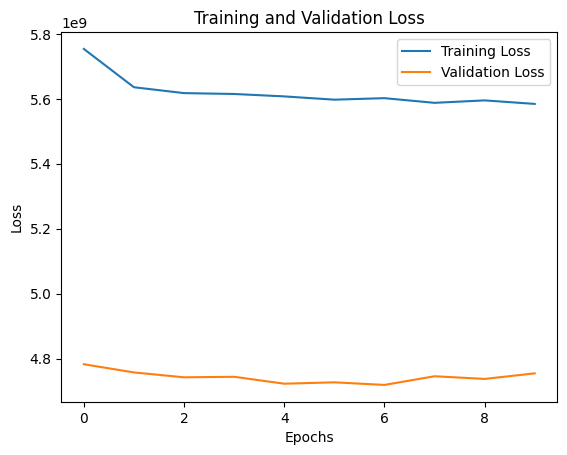

In [109]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [110]:

# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(256, activation='relu')(input)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(128, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(64, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(32, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model_2=Model(input, output)

# Compile the model
ANN_model_2.compile(loss='mse',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history_2 = ANN_model_2.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 7387316736.0000 - root_mean_squared_error: 85822.5078 - val_loss: 4783331328.0000 - val_root_mean_squared_error: 69161.6328
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 5321538560.0000 - root_mean_squared_error: 72827.1562 - val_loss: 4793060864.0000 - val_root_mean_squared_error: 69231.9375
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 5528108032.0000 - root_mean_squared_error: 74281.2656 - val_loss: 4748900864.0000 - val_root_mean_squared_error: 68912.2656
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 5999455232.0000 - root_mean_squared_error: 77299.5469 - val_loss: 4749899264.0000 - val_root_mean_squared_error: 68919.5156
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5549466624.0000 - root_mean_squared_error: 74260.4219 - val_loss: 4731373568.0000 - val_root_mean_squared_error: 68784.9844
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 58

In [111]:
ANN_model_2_scores=evaluation_results(model=ANN_model_2)
ANN_model_2_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


{'Training RMSE': 74804.60584347622,
 'Training MAE': 20820.70759142223,
 'Valid RMSE': 69161.60923421218,
 'Valid MAE': 20863.64108984717}

In [112]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(X_train_df, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
XGB_model_scores=evaluation_results(model=XGB_model)
XGB_model_scores

{'Training RMSE': 62717.13662306095,
 'Training MAE': 18697.166757695777,
 'Valid RMSE': 71495.03591217956,
 'Valid MAE': 20614.750708743173}

In [120]:
# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(32, activation='relu')(input)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model_3=Model(input, output)

# Compile the model
ANN_model_3.compile(loss='mse',
                    optimizer='adam',
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history_3= ANN_model_3.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32)

Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 6210021888.0000 - root_mean_squared_error: 78587.9219 - val_loss: 4843267584.0000 - val_root_mean_squared_error: 69593.5859
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5460848128.0000 - root_mean_squared_error: 73731.0703 - val_loss: 4818728960.0000 - val_root_mean_squared_error: 69417.0625
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 5805258240.0000 - root_mean_squared_error: 75915.6016 - val_loss: 4781570048.0000 - val_root_mean_squared_error: 69148.8984
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 5230774784.0000 - root_mean_squared_error: 72051.2656 - val_loss: 4776491520.0000 - val_root_mean_squared_error: 69112.1641
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5700778496.0000 - root_mean_squared_error: 75325.8828 - val_loss: 4773882368.0000 - val_root_mean_squared_error: 69093.2891
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 62

In [121]:
ANN_model_3_scores=evaluation_results(model=ANN_model_3)
ANN_model_3_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


{'Training RMSE': 75205.60505076464,
 'Training MAE': 21586.756638566916,
 'Valid RMSE': 69593.59814993301,
 'Valid MAE': 21645.750953336217}

In [124]:
# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(32, activation='relu')(input)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dense(256, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model_4=Model(input, output)

# Compile the model
ANN_model_4.compile(loss='mse',
                    optimizer='adam',
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history_4= ANN_model_4.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32)

Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 6111408640.0000 - root_mean_squared_error: 77864.0156 - val_loss: 4773865472.0000 - val_root_mean_squared_error: 69093.1641
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 5374595584.0000 - root_mean_squared_error: 73098.0312 - val_loss: 4772710400.0000 - val_root_mean_squared_error: 69084.8047
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 6084343296.0000 - root_mean_squared_error: 77553.9688 - val_loss: 4750606336.0000 - val_root_mean_squared_error: 68924.6406
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 5833204736.0000 - root_mean_squared_error: 75973.6797 - val_loss: 4739184640.0000 - val_root_mean_squared_error: 68841.7344
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5284493824.0000 - root_mean_squared_error: 72446.5781 - val_loss: 4729248768.0000 - val_root_mean_squared_error: 68769.5312
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 51

In [125]:
ANN_model_4_scores=evaluation_results(model=ANN_model_4)
ANN_model_4_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


{'Training RMSE': 74314.62490920424,
 'Training MAE': 19235.700364375018,
 'Valid RMSE': 68607.14196204477,
 'Valid MAE': 19251.347986795183}

In [126]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


xgb = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [1, 1.5, 2, 3, 4],
    'min_child_weight': [1, 3, 5, 7],
}

# Define the RandomizedSearchCV
rs_XGB_model = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
rs_XGB_model.fit(X_train_df, y_train)

# Best parameters and best score
best_params = rs_XGB_model.best_params_
best_params


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'subsample': 1.0,
 'reg_lambda': 3,
 'reg_alpha': 0.1,
 'n_estimators': 200,
 'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [127]:
rs_XGB_model_scores=evaluation_results(model=rs_XGB_model)
rs_XGB_model_scores

{'Training RMSE': 73947.36658557542,
 'Training MAE': 19855.511207972188,
 'Valid RMSE': 68453.38980497388,
 'Valid MAE': 19935.029170405145}

In [129]:
rs_XGB_model_scores['Model_name'] = 'Tuned XGB Regressor'
ANN_model_4_scores['Model_name'] = 'ANN from 32, first layer bachnormalization'
ANN_model_3_scores['Model_name'] = 'ANN from 32, No batchnormalization'
ANN_model_2_scores['Model_name'] = 'ANN with BatchNormalizarion in each layer'
ANN_model_scores['Model_name'] = 'ANN, No batchnormalization'
XGB_model_scores['Model_name']= 'XGB Regressor'


#Turn all model score dictionaries into a list
all_model_score=[rs_XGB_model_scores,
                 XGB_model_scores,
                 ANN_model_4_scores,
                 ANN_model_3_scores,
                 ANN_model_2_scores,
                 ANN_model_scores]
# create DataFrame
model_comprison_df=pd.DataFrame(all_model_score).sort_values(by='Valid RMSE', ascending=False)
model_comprison_df

,Training RMSE,Training MAE,Valid RMSE,Valid MAE,Model_name
1,62717.136623,18697.166758,71495.035912,20614.750709,XGB Regressor
3,75205.605051,21586.756639,69593.598150,21645.750953,"ANN from 32, No batchnormalization"
4,74804.605843,20820.707591,69161.609234,20863.641090,ANN with BatchNormalizarion in each layer
5,74787.452564,21235.986121,69159.281084,21316.598717,"ANN, No batchnormalization"
2,74314.624909,19235.700364,68607.141962,19251.347987,"ANN from 32, first layer bachnormalization"
0,73947.366586,19855.511208,68453.389805,19935.029170,Tuned XGB Regressor


In [130]:
# mean RMSE score of all models
means_rmse=model_comprison_df['Valid RMSE'].mean()
means_rmse

69411.67602454271

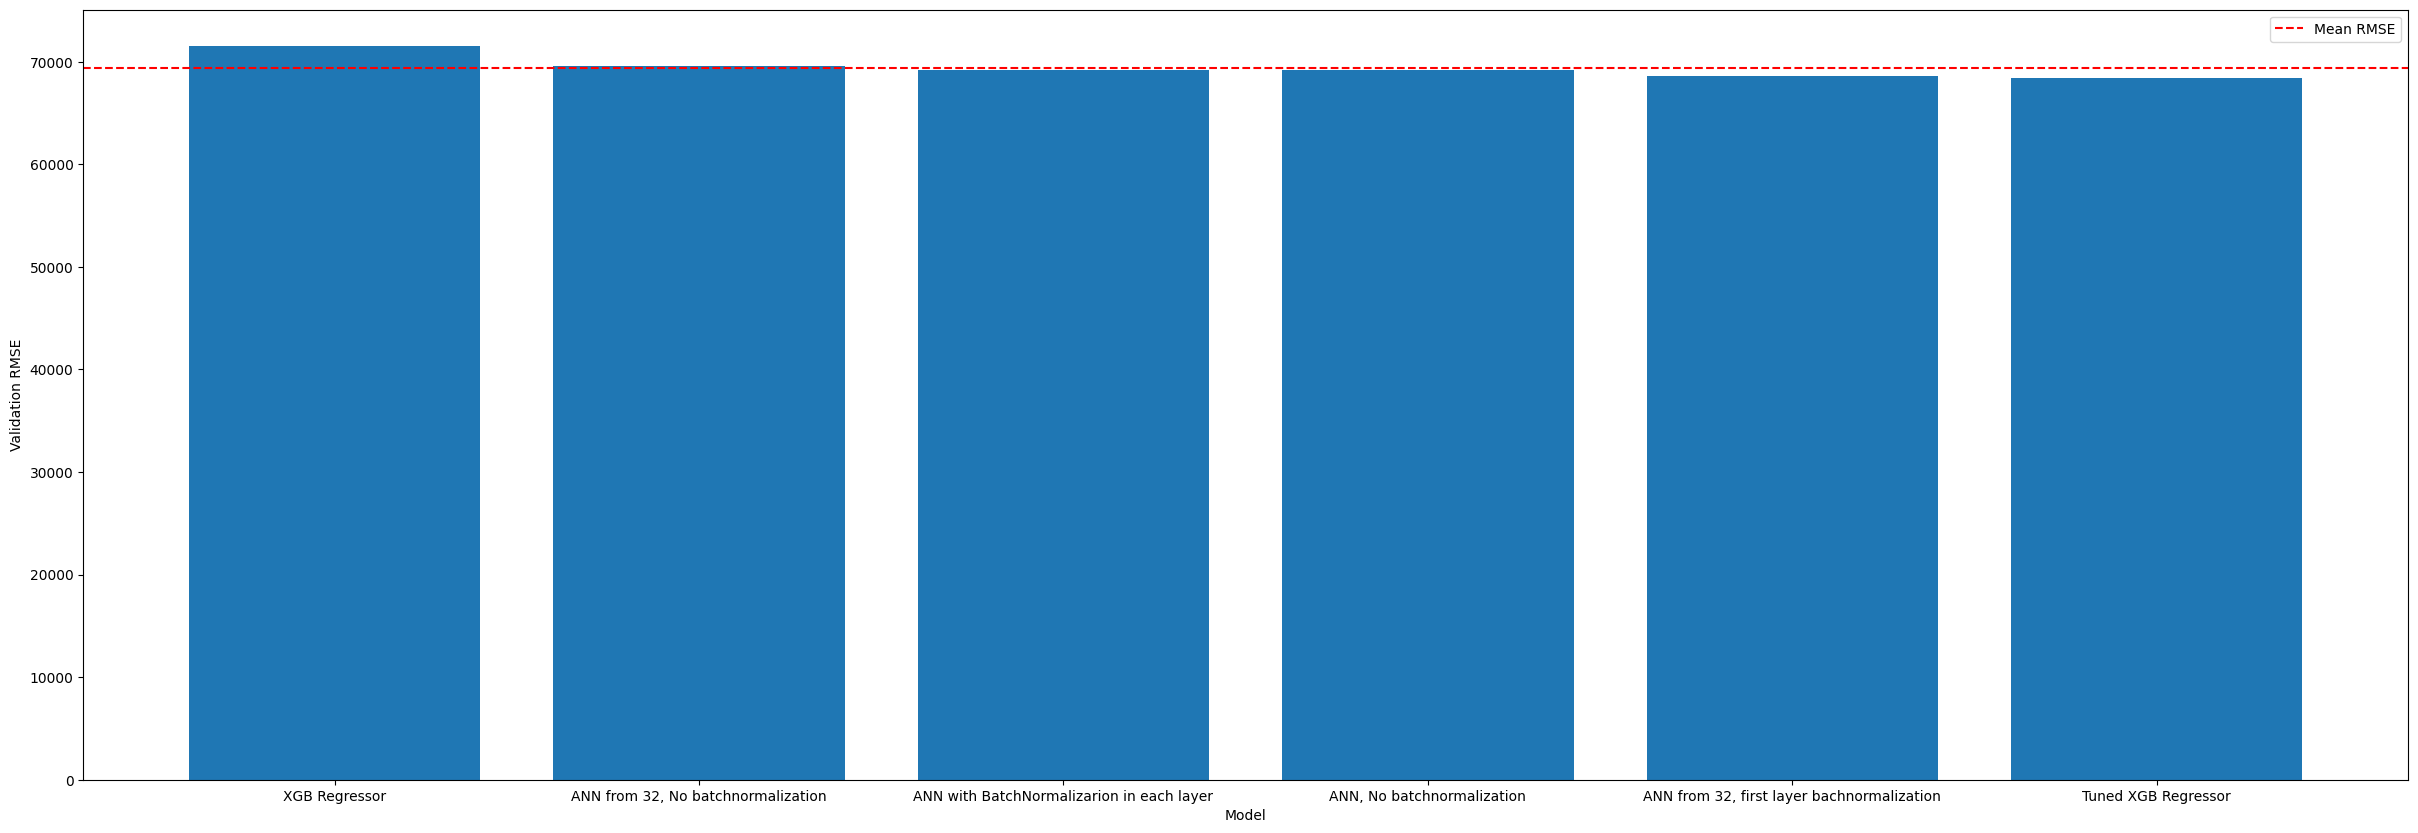

In [137]:
plt.figure(figsize=(30,10))
plt.bar(x=model_comprison_df['Model_name'],
       height=model_comprison_df['Valid RMSE'].values)
plt.xlabel('Model')
plt.ylabel('Validation RMSE')
plt.axhline(y=means_rmse,
           color='red',
           linestyle='--',
           label='Mean RMSE')

plt.tight_layout
plt.legend()